In [1]:
import os
import jCMIP as jc
Clist = jc.readList(('CMIP6listnew'))

from netCDF4 import Dataset
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import cftime
%matplotlib inline

#### Check vmask and v.mask

/home/users/jmecking001/miniconda3/envs/jordi_2021/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


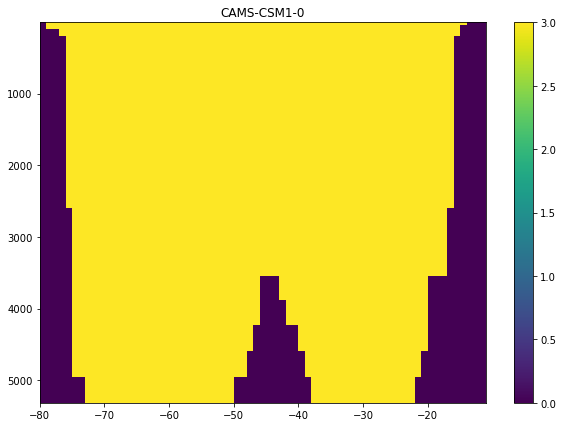

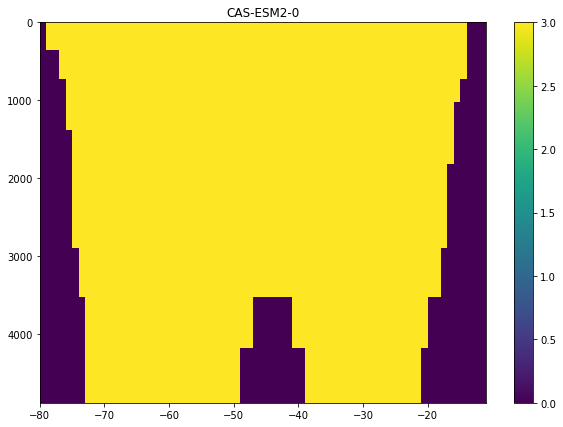

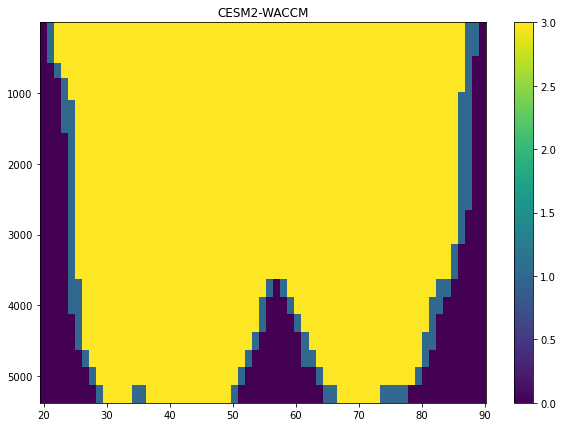

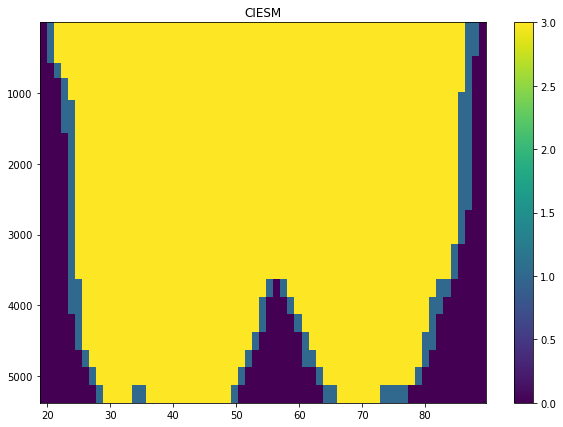

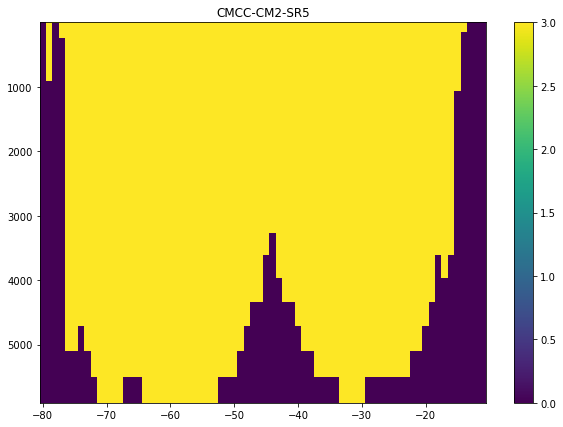

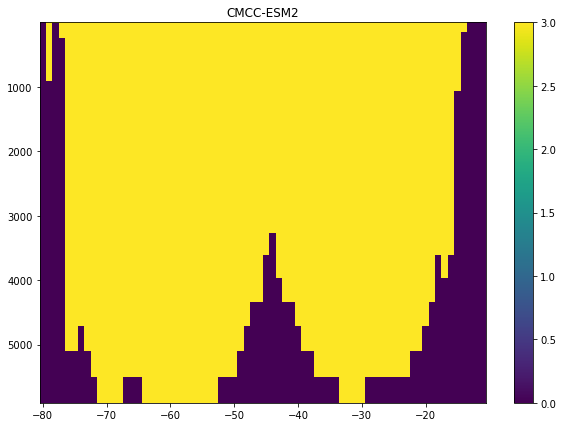

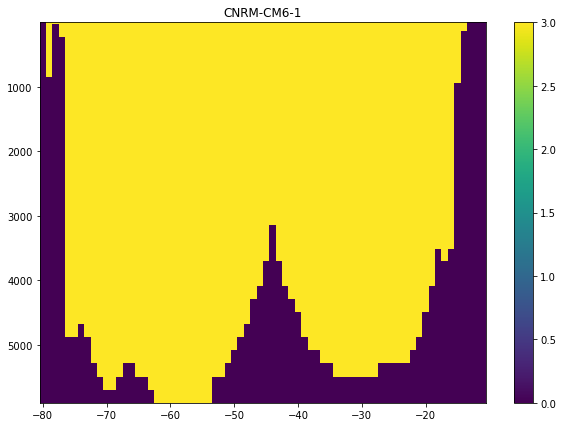

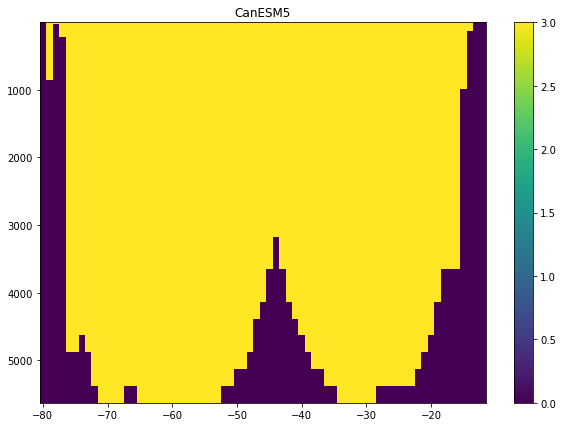

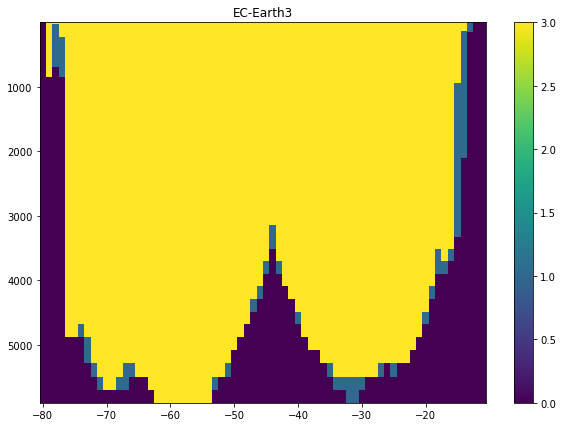

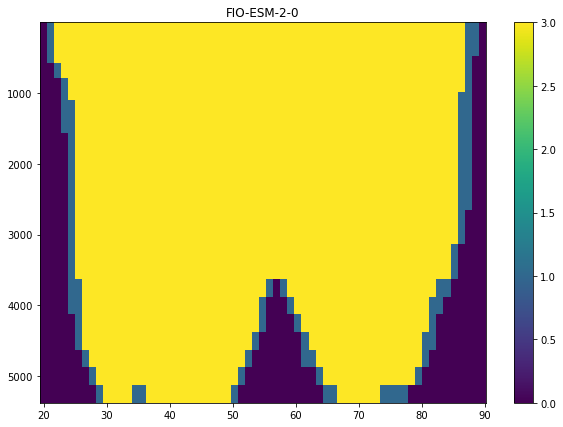

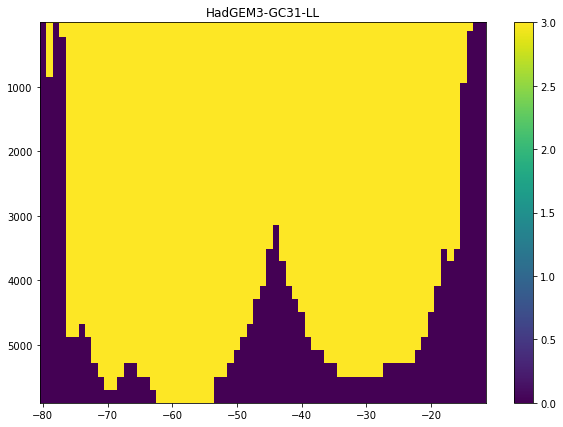

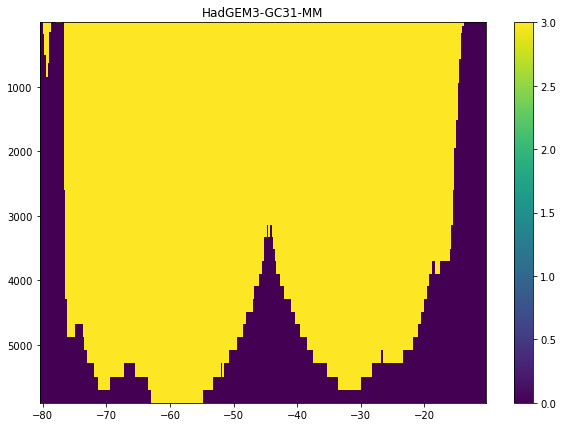

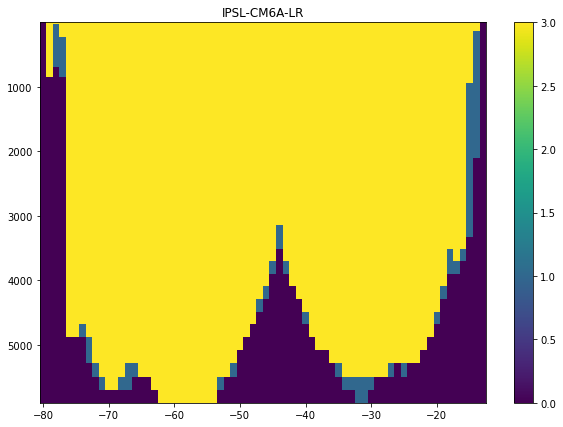

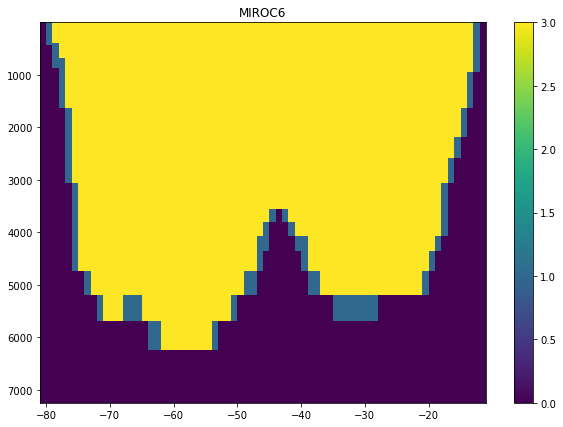

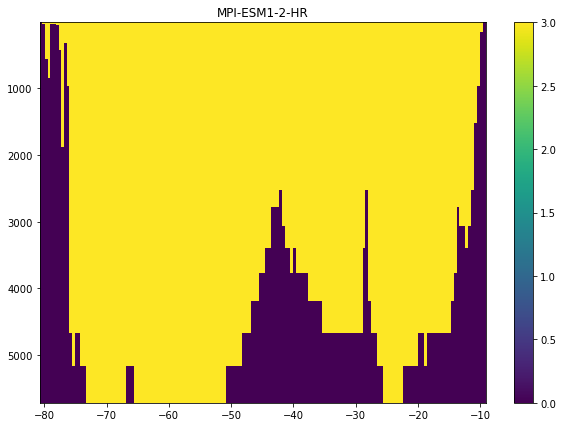

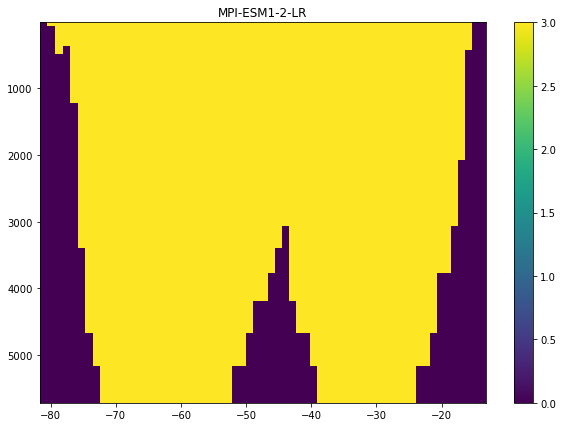

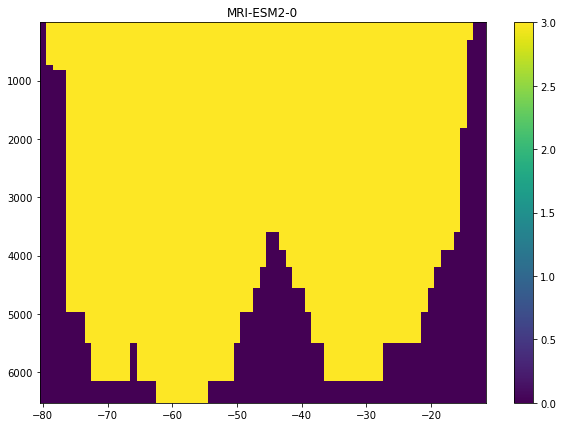

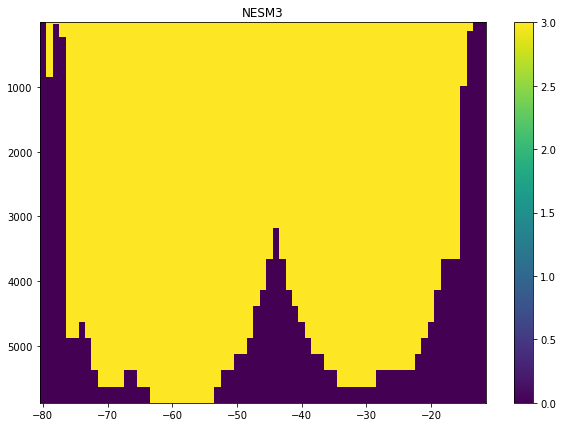

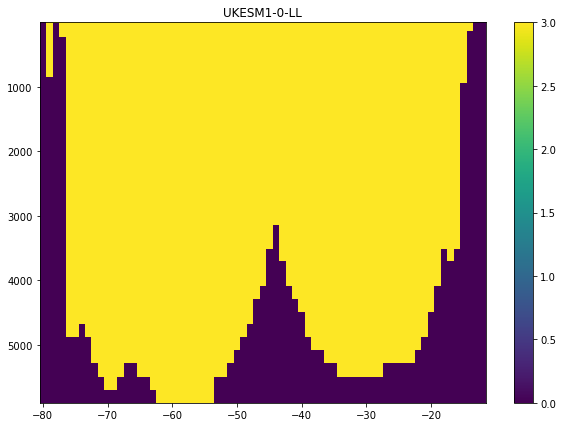

In [10]:
#totmod =  ['CAMS-CSM1-0','CAS-ESM2-0','CESM2-WACCM','CIESM','CMCC-CM2-SR5','CMCC-ESM2','CNRM-ESM2-1','CanESM5','EC-Earth3','FIO-ESM-2-0',
#            'HadGEM3-GC31-LL','HadGEM3-GC31-MM','IPSL-CM6A-LR','MIROC6','MPI-ESM1-2-HR','MPI-ESM1-2-LR','MRI-ESM2-0','NESM3','UKESM1-0-LL']
#ENS    =  ['r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2','r2i1p1f2','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f3',
#           'r1i1p1f3','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2']
#EXP    = 'historical'

totmod =  ['CAMS-CSM1-0','CAS-ESM2-0','CESM2-WACCM','CIESM','CMCC-CM2-SR5','CMCC-ESM2','CNRM-CM6-1','CanESM5','EC-Earth3','FIO-ESM-2-0',
            'HadGEM3-GC31-LL','HadGEM3-GC31-MM','IPSL-CM6A-LR','MIROC6','MPI-ESM1-2-HR','MPI-ESM1-2-LR','MRI-ESM2-0','NESM3','UKESM1-0-LL']
ENS    =  ['r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f3',
           'r1i1p1f3','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2']
EXP    = 'ssp585'

for i in range (len(totmod)):
    outfile = ('/home/users/jordi/section26data/' + totmod[i] + '_' + EXP + '_' + ENS[i] + '.nc')
    ncid    = Dataset(outfile,'r')

    #Read variables
    v    = ncid.variables['vo'][:,:,0,:]
    lev  = ncid.variables['lev'][:]
    lon  = ncid.variables['lon'][:,:]
    dx   = ncid.variables['dx'][0,:]
    dz   = ncid.variables['dz'][:,0,:]
    vmask = ncid.variables['vmask'][:,:,:]
    ncid.close()
        
    time=0
    plt.figure(i,figsize=(10,7))
    plt.pcolormesh(lon,lev,1-v[time,:,:].mask+2*vmask[:,0,:])
    plt.gca().invert_yaxis()
    plt.title(str(totmod[i]))
    plt.colorbar()

#Grid cells with value 3 are not masked by both masks, with value 2 are only masked by v.mask and with value 1 are only masked by vmask.
#Values of 0 are masked by both masks.

#### Check vmask and dz

/home/users/jmecking001/miniconda3/envs/jordi_2021/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


2.0
2.0
2.0


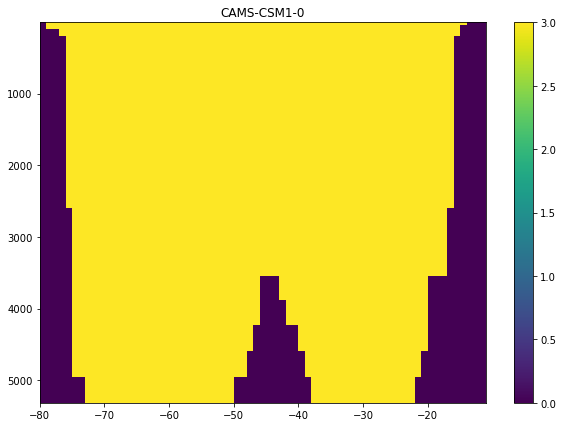

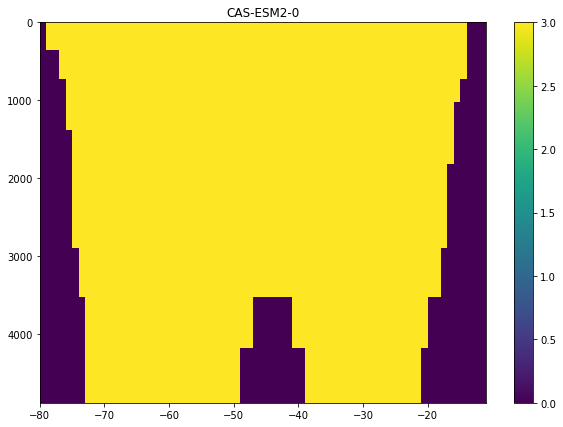

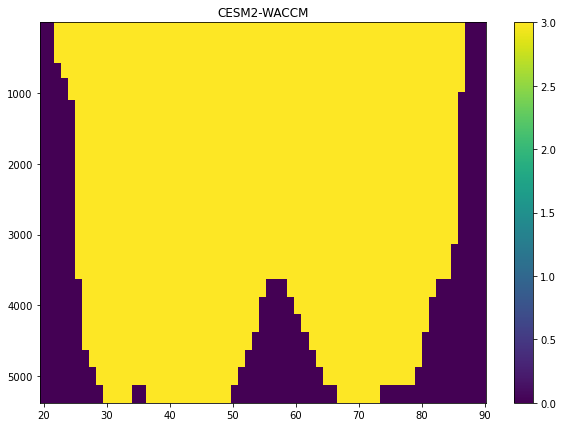

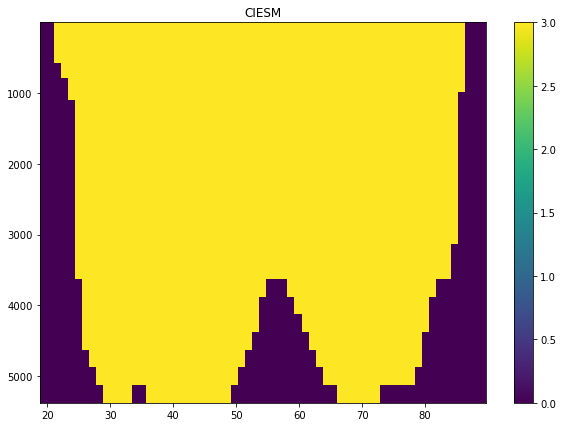

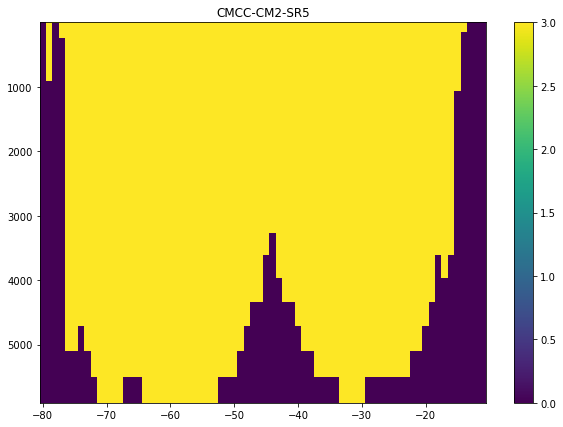

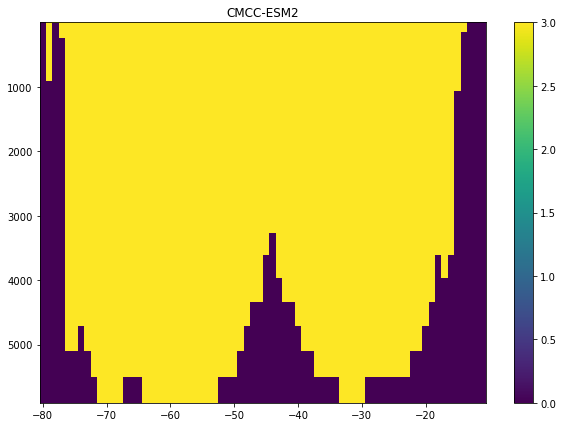

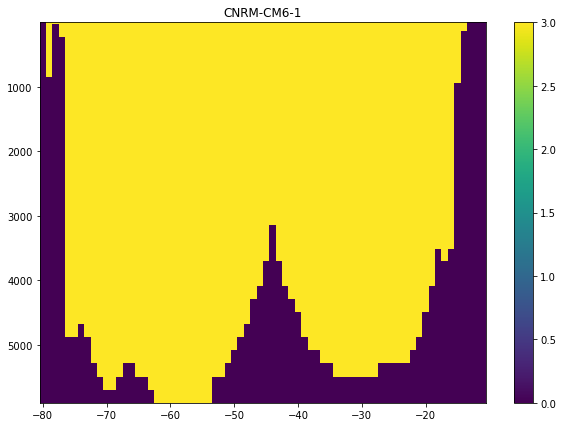

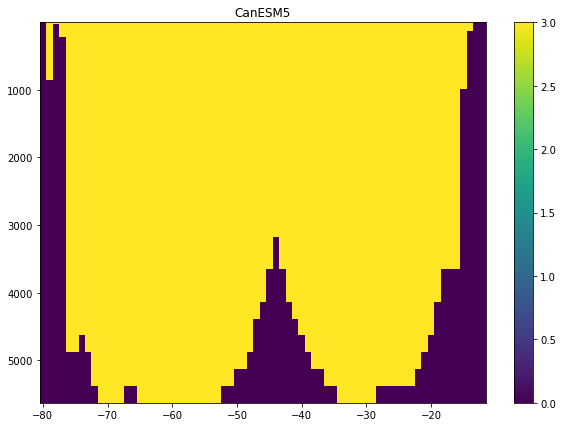

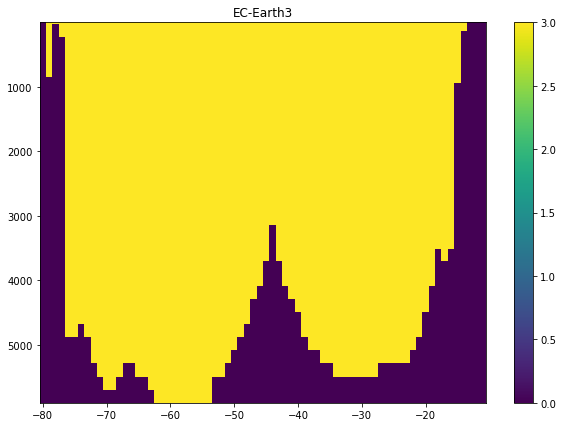

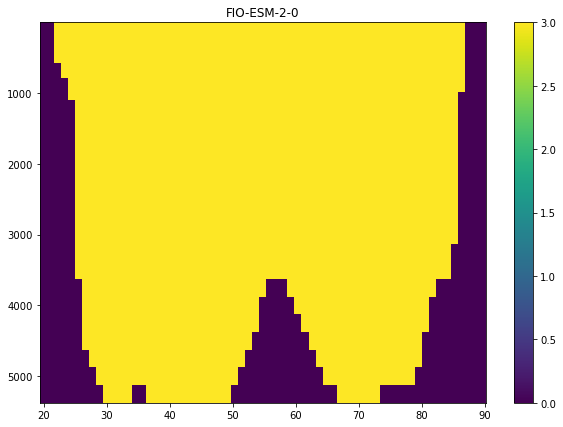

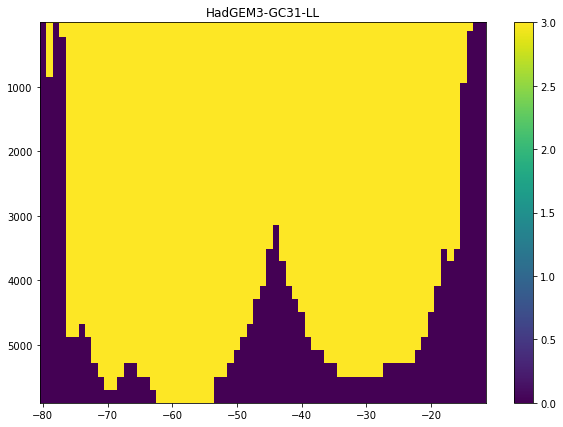

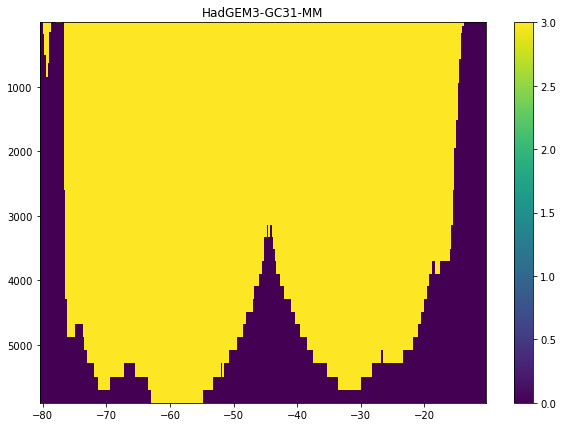

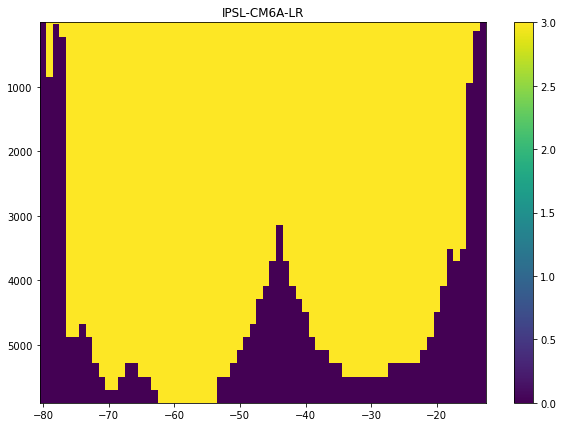

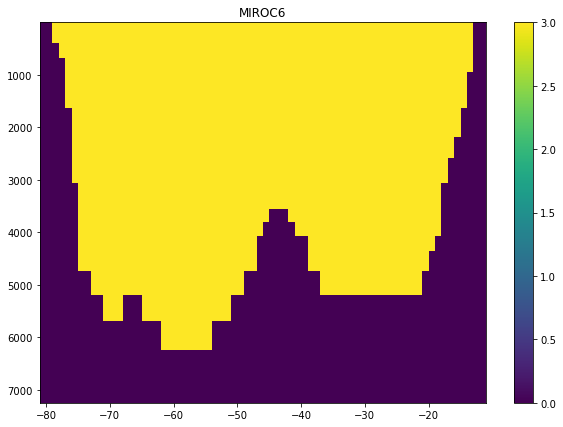

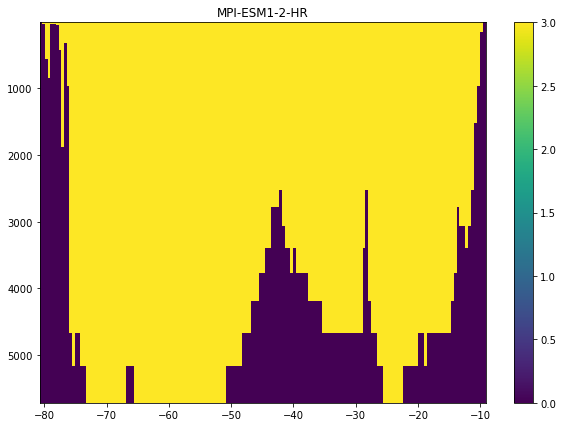

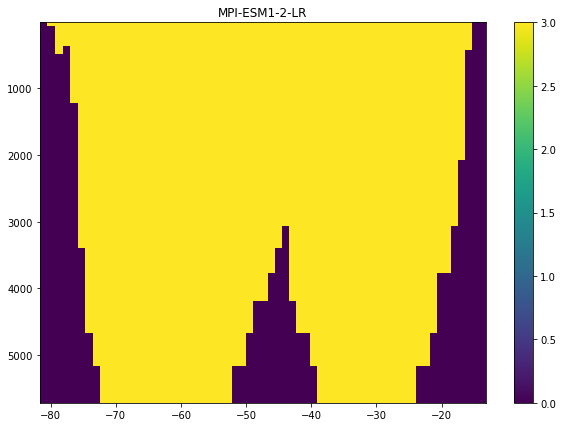

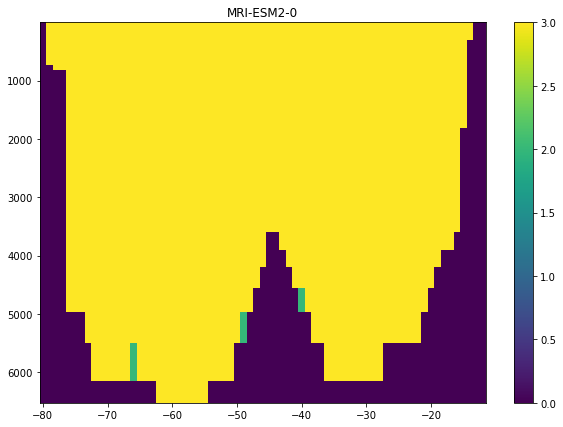

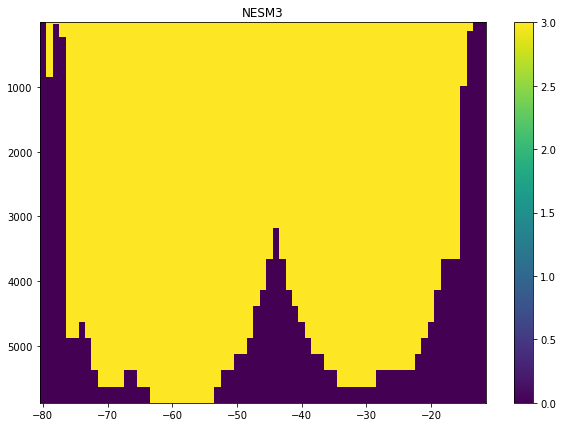

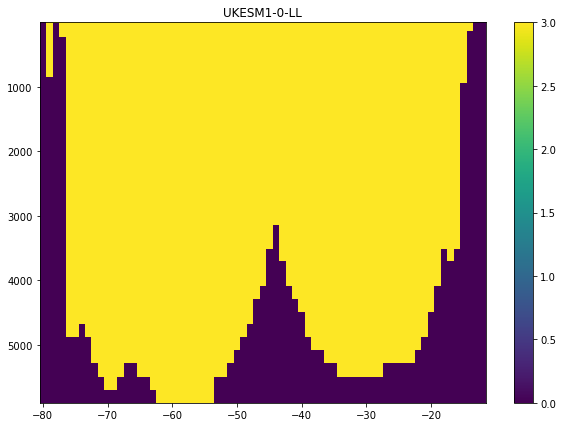

In [3]:
#totmod =  ['CAMS-CSM1-0','CAS-ESM2-0','CESM2-WACCM','CIESM','CMCC-CM2-SR5','CMCC-ESM2','CNRM-CM6-1','CNRM-ESM2-1','CanESM5','EC-Earth3','FIO-ESM-2-0',
#            'HadGEM3-GC31-LL','HadGEM3-GC31-MM','IPSL-CM6A-LR','MIROC6','MPI-ESM1-2-HR','MPI-ESM1-2-LR','MRI-ESM2-0','NESM3','UKESM1-0-LL']
#ENS    =  ['r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2','r2i1p1f2','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f3',
#           'r1i1p1f3','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2']
#EXP    = 'historical'

totmod =  ['CAMS-CSM1-0','CAS-ESM2-0','CESM2-WACCM','CIESM','CMCC-CM2-SR5','CMCC-ESM2','CNRM-CM6-1','CanESM5','EC-Earth3','FIO-ESM-2-0',
            'HadGEM3-GC31-LL','HadGEM3-GC31-MM','IPSL-CM6A-LR','MIROC6','MPI-ESM1-2-HR','MPI-ESM1-2-LR','MRI-ESM2-0','NESM3','UKESM1-0-LL']
ENS    =  ['r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f3',
           'r1i1p1f3','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2']
EXP    = 'ssp585'

for i in range (len(totmod)):
    outfile = ('/home/users/jordi/section26data/' + totmod[i] + '_' + EXP + '_' + ENS[i] + '.nc')
    ncid    = Dataset(outfile,'r')

    #Read variables
    v    = ncid.variables['vo'][:,:,0,:]
    lev  = ncid.variables['lev'][:]
    lon  = ncid.variables['lon'][:,:]
    dx   = ncid.variables['dx'][0,:]
    dz   = ncid.variables['dz'][:,0,:]
    vmask = ncid.variables['vmask'][:,:,:]
    ncid.close()
    
    time=0
    dz1 = np.where(dz>0,1,0)
    v1  = np.where(v[time,:,:]>0,1,0)
    plt.figure(2*i-1,figsize=(10,7))
    plt.pcolormesh(lon,lev,vmask[:,0,:]+2*dz1[:,:])
    plt.gca().invert_yaxis()
    plt.title(str(totmod[i]))
    plt.colorbar()
    
    if totmod[i] == 'MRI-ESM2-0':
        print((vmask[:,0,:]+2*dz1[:,:])[-3,14])
        print((vmask[:,0,:]+2*dz1[:,:])[-4,31])
        print((vmask[:,0,:]+2*dz1[:,:])[-5,40])
    
#Grid cells with value 3 are not masked by both masks, with value 2 are only masked by v.mask and with value 1 are only masked by vmask.
#Values of 0 are masked by both masks.

#### Check MPI-LR halo points not removed

/home/users/jmecking001/miniconda3/envs/jordi_2021/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/users/jmecking001/miniconda3/envs/jordi_2021/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


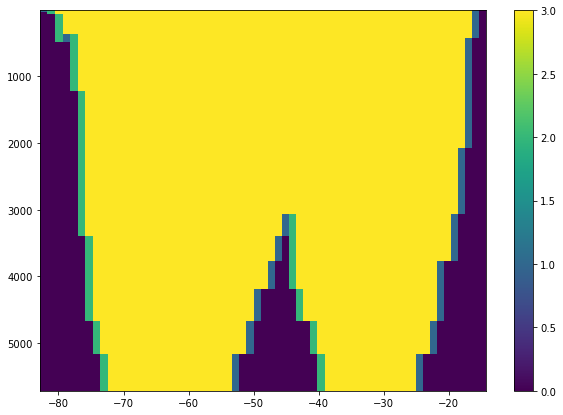

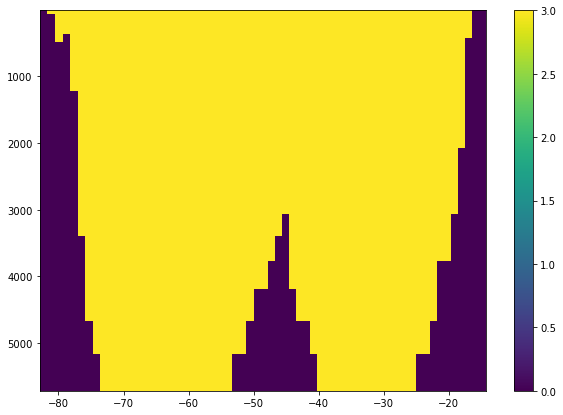

In [6]:
model  = 'MPI-ESM1-2-LR'
ENS    = 'r1i1p1f1'
EXP    = 'historical'

outfile = ('/home/users/jordi/section26data/' + model + '_inclhalo' + EXP + '_' + ENS + '.nc')
ncid    = Dataset(outfile,'r')

#Read variables
v    = ncid.variables['vo'][:,:,0,:]
lev  = ncid.variables['lev'][:]
lon  = ncid.variables['lon'][:,:]
dx   = ncid.variables['dx'][0,:]
dz   = ncid.variables['dz'][:,0,:]
vmask = ncid.variables['vmask'][:,:,:]
ncid.close()
    
time=0
plt.figure(1,figsize=(10,7))
plt.pcolormesh(lon,lev,1-v[time,:,:].mask+2*vmask[:,0,:])
plt.gca().invert_yaxis()
#plt.title(str(totmod[i]))
plt.colorbar()

plt.plot(np.nansum(np.nansum(v)))

#### Check MPI-HR test2 (vmask[ilat] instead of vmask[ilat:ilat+1])

/home/users/jmecking001/miniconda3/envs/jordi_2021/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


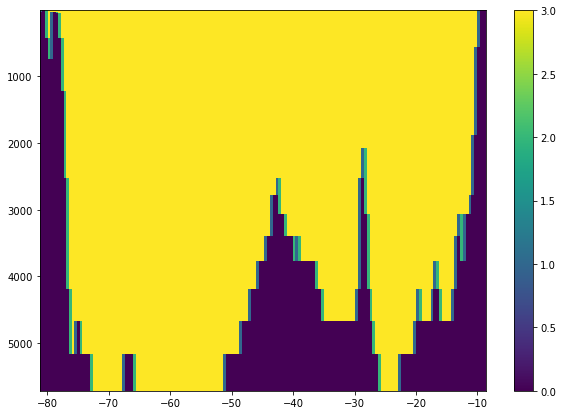

In [11]:
model  = 'MPI-ESM1-2-HR'
ENS    = 'r1i1p1f1'
EXP    = 'historical'

outfile = ('/home/users/jordi/section26data/' + model + '_' + EXP + '_' + ENS + 'test2.nc')
ncid    = Dataset(outfile,'r')

#Read variables
v    = ncid.variables['vo'][:,:,0,:]
lev  = ncid.variables['lev'][:]
lon  = ncid.variables['lon'][:,:]
dx   = ncid.variables['dx'][0,:]
dz   = ncid.variables['dz'][:,0,:]
vmask = ncid.variables['vmask'][:,:,:]
ncid.close()
    
time=0
plt.figure(1,figsize=(10,7))
plt.pcolormesh(lon,lev,1-v[time,:,:].mask+2*vmask[:,0,:])
plt.gca().invert_yaxis()
#plt.title(str(totmod[i]))
plt.colorbar()

#### CMCC-CM2 test (vmask[ilonmin-1:ilonmax-1], since halo points are already removed from mask files)

/home/users/jmecking001/miniconda3/envs/jordi_2021/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


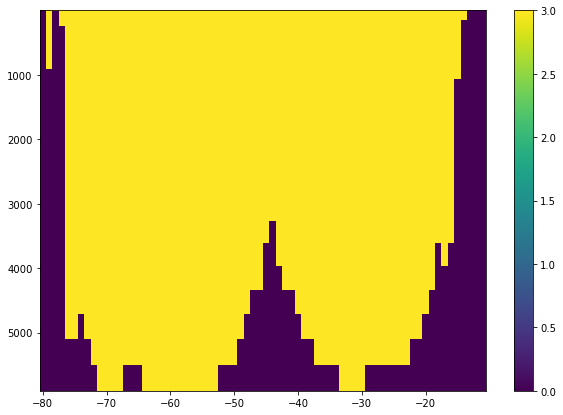

In [14]:
model  = 'CMCC-CM2-SR5'
ENS    = 'r1i1p1f1'
EXP    = 'historical'

outfile = ('/home/users/jordi/section26data/' + model + '_' + EXP + '_' + ENS + 'test.nc')
ncid    = Dataset(outfile,'r')

#Read variables
v    = ncid.variables['vo'][:,:,0,:]
lev  = ncid.variables['lev'][:]
lon  = ncid.variables['lon'][:,:]
dx   = ncid.variables['dx'][0,:]
dz   = ncid.variables['dz'][:,0,:]
vmask = ncid.variables['vmask'][:,:,:]
ncid.close()
    
time=0
plt.figure(1,figsize=(10,7))
plt.pcolormesh(lon,lev,1-v[time,:,:].mask+2*vmask[:,0,:])
plt.gca().invert_yaxis()
#plt.title(str(totmod[i]))
plt.colorbar()